In [8]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp
from Bio.SeqUtils import lcc, GC
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO,SeqRecord
from Bio.Alphabet import IUPAC

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from joblib import dump, load
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas(ascii=True)
%matplotlib inline


In [9]:

def plot_align(s1,s2):
    score = len(s1)-hamming_distance(s1,s2)
    print(format_alignment(s1,s2, score, 0, len(s1)))
    

def align(s1,s2):
    score = len(s1)-hamming_distance(s1,s2)
    res = format_alignment(s1,s2, score, 0, len(s1))
    return res


def hamming_distance(s1, s2):
    """Return the Hamming distance between equal-length sequences"""
    if len(s1) != len(s2):
        raise ValueError("Undefined for sequences of unequal length")
    return sum(el1 != el2 for el1, el2 in zip(s1, s2))


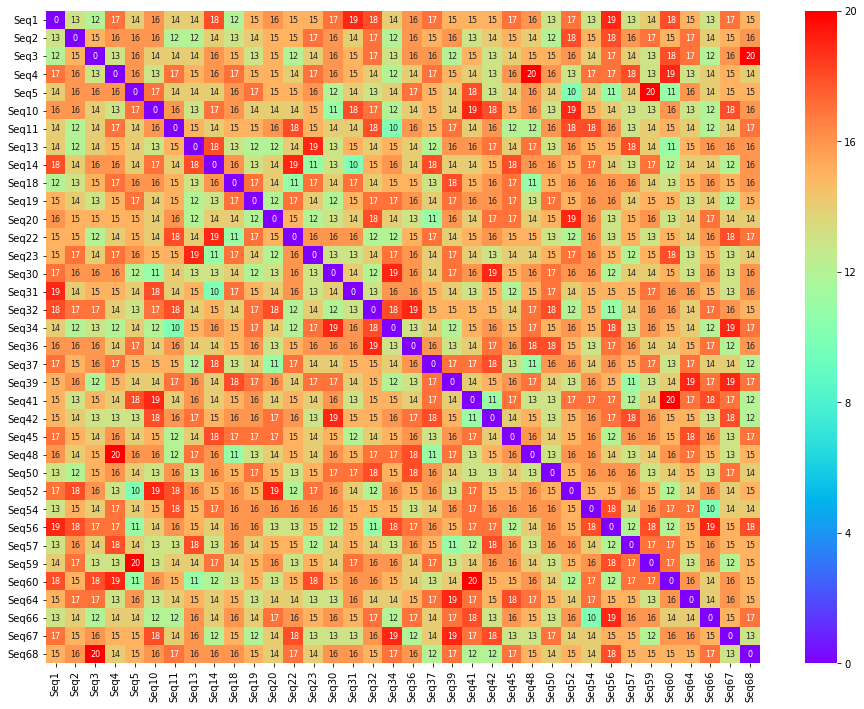

In [10]:
records = list(SeqIO.parse("./9.fasta", "fasta"))
res = []
for seq1 in records:
    for seq2 in records:
        d = hamming_distance(seq1, seq2)
        if d != 0:
            d += 0
        res.append([seq1.name, seq2.name, d])
        
df = pd.DataFrame(res)
l = df[0].unique().shape[0]
matrix = df[2].values.reshape(l,l)
dfres = pd.DataFrame(matrix, index = df[1].unique(), columns = df[0].unique())


f, ax = plt.subplots(1,1,figsize=(16,12))
sns.heatmap(dfres, cmap = 'rainbow', annot  = True, annot_kws={"size": 8}, ax = ax)


plt.savefig('./9.png', bbox_inches="tight", dpi = 300)
dfres.to_excel('9.xlsx')